<a href="https://colab.research.google.com/github/Kunlek10/Machine-Learning/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

In [28]:
#Fetch Data
df = pd.read_csv("/content/train.csv")
df.set_index('Id', inplace=True)

Dealing with Missing Values

In [29]:
df.drop(['LotFrontage', 'Alley', 'MasVnrType',
         'MasVnrType', 'FireplaceQu', 'PoolQC','Utilities',
         'LotConfig','HouseStyle','Exterior2nd', 'Fence',
         'BsmtExposure','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2',
         'KitchenAbvGr', 'GarageType', 'GarageYrBlt', 'GarageCars',
         'GarageQual','MiscFeature', 'Condition2'], axis=1, inplace=True)

In [30]:
df.shape

(1460, 59)

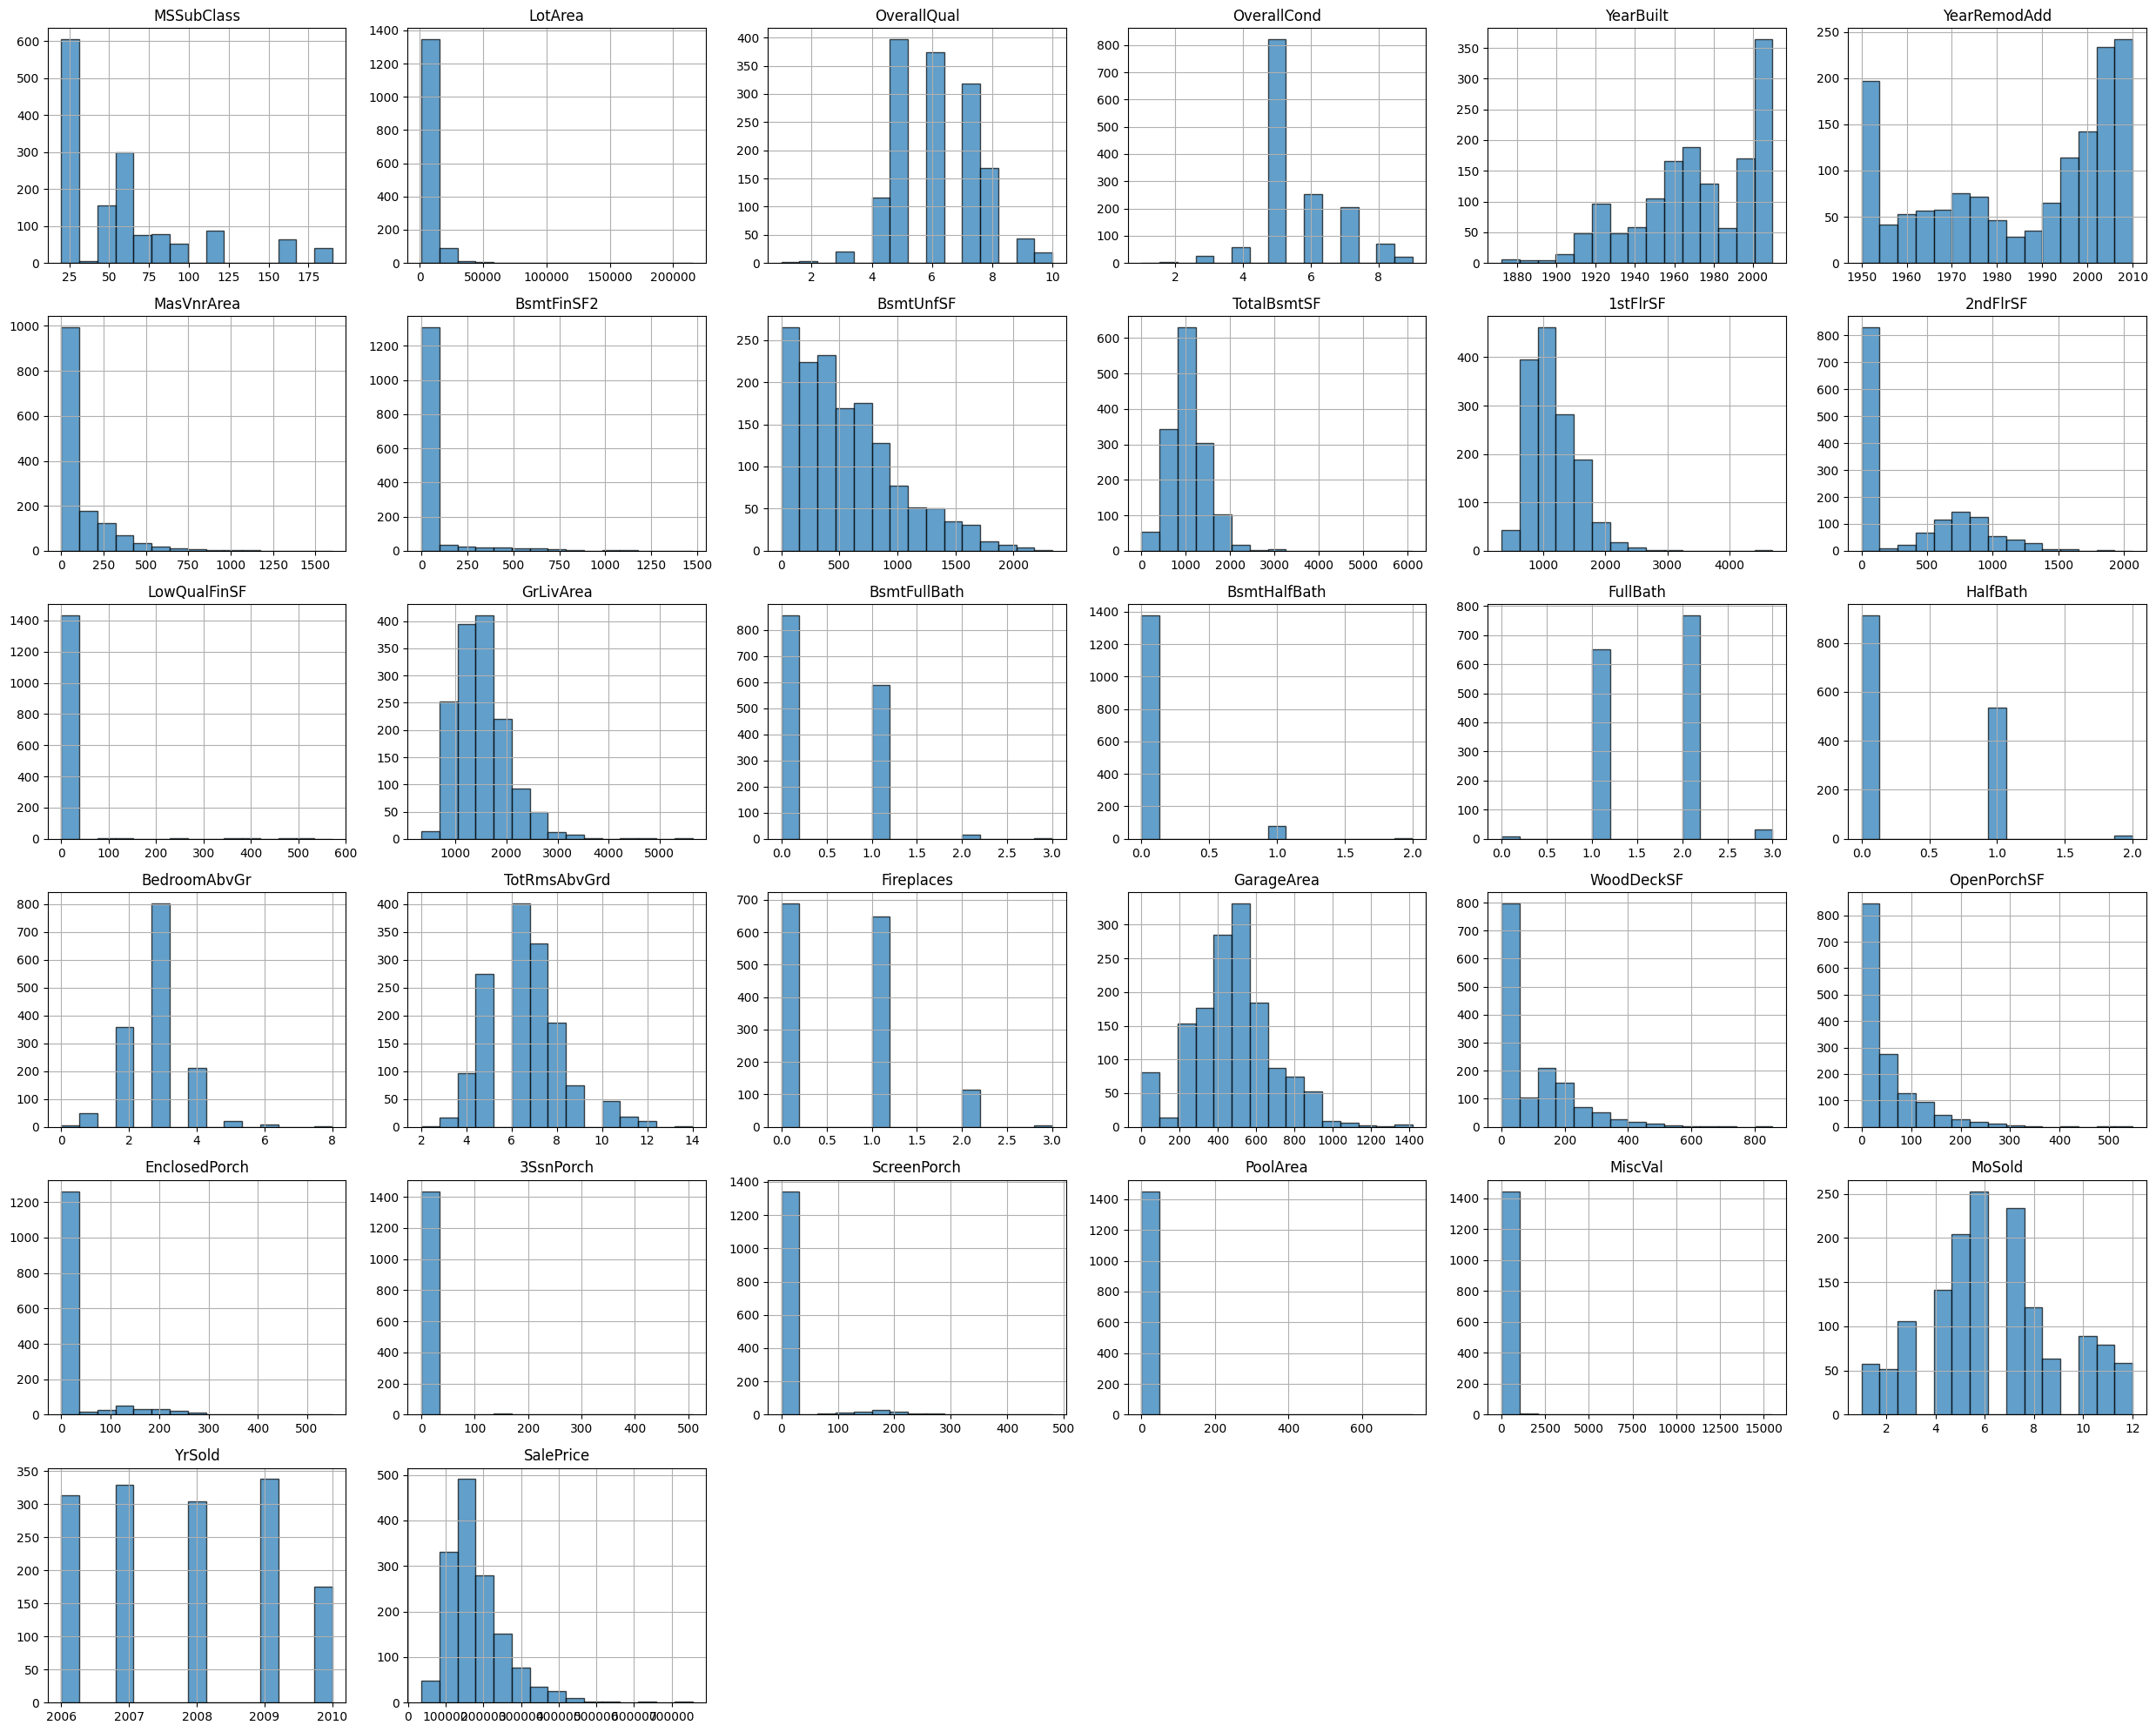

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical columns
df[numerical_columns].hist(bins=15, figsize=(25, 20), edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
df['BsmtQual'].fillna(0, inplace=True)
df['BsmtCond'].fillna(0, inplace=True)
df['GarageFinish'].fillna(0, inplace=True)
df['GarageCond'].fillna(0, inplace=True)

<ipython-input-32-9e2ebfd73588>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(0, inplace=True)
<ipython-input-32-9e2ebfd73588>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [33]:
df['LotShape'] = df['LotShape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['ExterQual'] = df['ExterQual'].replace({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})
df['ExterCond'] = df['ExterCond'].replace({'Ex': 4,'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df['BsmtQual'] = df['BsmtQual'].replace({'Ex': 4,'Gd': 3, 'TA': 2, 'Fa': 1, '0': 0})
df['BsmtCond'] = df['BsmtCond'].replace({'Gd': 4,'TA': 3, 'Fa': 2, 'Po': 1, '0': 0})
df['HeatingQC'] = df['HeatingQC'].replace({'Ex': 4,'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df['Street'] = df['Street'].replace({'Pave': 1, 'Grvl': 0})
df['Functional'] = df['Functional'].replace({'Typ': 6, 'Min2': 5, 'Min1': 4,'Mod': 3, 'Maj1': 2, 'Maj2': 1, 'Sev': 0})
df['KitchenQual'] = df['KitchenQual'].replace({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})
df['GarageCond'] = df['GarageCond'].replace({'Ex': 4,"Gd": 3, 'TA': 2, 'Fa': 1, 'Po': 0})
df['GarageFinish'] = df['GarageFinish'].replace({'Fin': 3,'RFn': 2, 'Unf': 1,'0': 0})
df['PavedDrive'] = df['PavedDrive'].replace({'Y': 2, 'P': 1, 'N': 0})

df['CentralAir'] = df['CentralAir'].replace({'Y': 1, 'N': 0})
df['LandContour'] = df['LandContour'].replace({'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0})
df['LandSlope'] = df['LandSlope'].replace({'Gtl': 2, 'Mod': 1, 'Sev': 0})

<ipython-input-33-6361f30f016a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['LotShape'] = df['LotShape'].replace({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
<ipython-input-33-6361f30f016a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExterQual'] = df['ExterQual'].replace({'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0})
<ipython-input-33-6361f30f016a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [34]:
#one-hot encoding
# Apply one-hot encoding only to the categorical columns
df = pd.get_dummies(df, columns=['MSSubClass', 'MSZoning', 'BldgType',
                                         'RoofStyle','RoofMatl', 'Exterior1st',
                                        'Foundation', 'Heating', 'Electrical',
                                        'SaleType', 'SaleCondition', 'Neighborhood', 'Condition1'])

In [35]:
# Apply conversion only to Boolean columns
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [36]:
col = df.columns
col

Index(['LotArea', 'Street', 'LotShape', 'LandContour', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn'],
      dtype='object', length=166)

In [37]:
df.iloc[:, 100:145]

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,...,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1457,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [38]:
df.shape

(1460, 166)

<ipython-input-39-240ab5b4ff6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


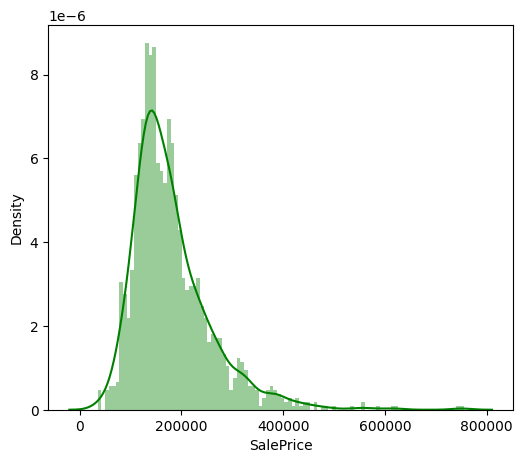

In [39]:
print(df['SalePrice'].describe())
plt.figure(figsize=(6, 5))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [40]:
corr_matrix = df.corr()

In [41]:
df = df.dropna()

In [42]:
df.shape

(1452, 166)

In [43]:
# Separate features and target variable
X = df.drop('SalePrice', axis=1)  # Features
y = df['SalePrice']  # Target variable

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 17305.32975945017
Mean Squared Error: 727897045.8147901
R-squared: 0.880799230926416


In [47]:
y.mean()

180615.06336088156

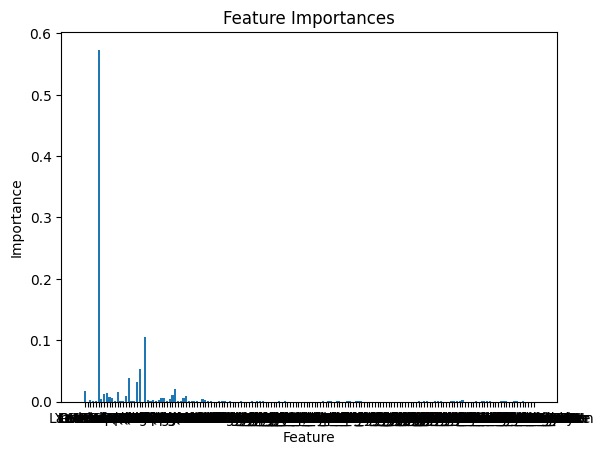

In [48]:
# Get feature importances
importances = model.feature_importances_

# Plot feature importances
features = X.columns
plt.bar(features, importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [49]:
df_imp_feature= pd.DataFrame(zip(features, importances * 100))
df_imp_feature

,0,1
0,LotArea,1.672906
1,Street,0.000174
2,LotShape,0.186223
3,LandContour,0.079000
4,LandSlope,0.094300
...,...,...
160,Condition1_PosN,0.036083
161,Condition1_RRAe,0.000974
162,Condition1_RRAn,0.002751
163,Condition1_RRNe,0.000004


In [50]:
df_imp_feature.rename(columns={0: 'feature', 1:'importance'}, inplace=True)

In [51]:
df_imp_feature['importance'].describe()

,importance
count,165.000000
mean,0.606061
std,4.559516
min,0.000000
25%,0.002296
50%,0.016690
75%,0.070166
max,57.347185


In [52]:
# Get top 10 largest values from the 'Price' column
top_30 = df_imp_feature.nlargest(30, 'importance')

# Print the top 10 largest values
print(top_30)

                  feature  importance
5             OverallQual   57.347185
22              GrLivArea   10.462778
20               2ndFlrSF    5.336874
16            TotalBsmtSF    3.825478
19               1stFlrSF    3.143273
33             GarageArea    2.126315
0                 LotArea    1.672906
12               BsmtQual    1.525050
8            YearRemodAdd    1.319987
7               YearBuilt    1.284938
32           GarageFinish    1.083158
15              BsmtUnfSF    0.922020
37            OpenPorchSF    0.878293
9              MasVnrArea    0.699202
36             WoodDeckSF    0.627163
29           TotRmsAbvGrd    0.626388
10              ExterQual    0.624099
28            KitchenQual    0.528753
31             Fireplaces    0.494921
6             OverallCond    0.452798
43                 MoSold    0.352760
23           BsmtFullBath    0.318121
44                 YrSold    0.204561
27           BedroomAbvGr    0.196090
2                LotShape    0.186223
138  Neighbo

Linear Regression model

In [53]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [64]:
# Apply Lasso (L1 regularization)

# Initialize lists to track training and test scores
train_scores = []
test_scores = []
alphas = []

# For loop to increase alpha from 0.1 to 2.5 in steps of 0.05
for i in range(200):
    alpha_value = 0.01 + i * 0.05
    lasso = Lasso(alpha=alpha_value)
    lasso.fit(X_train, y_train)

    # Track the R^2 scores for training and testing sets
    alphas.append(alpha_value)
    train_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.816e+10, tolerance: 7.344e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.746e+10, tolerance: 7.344e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.639e+10, tolerance: 7.344e

In [65]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Alpha': alphas,
    'Training R^2': train_scores,
    'Test R^2': test_scores
})

# Print the DataFrame
print(results_df)

     Alpha  Training R^2  Test R^2
0     0.01      0.901493  0.876525
1     0.06      0.901493  0.876517
2     0.11      0.901493  0.876505
3     0.16      0.901493  0.876492
4     0.21      0.901493  0.876478
..     ...           ...       ...
195   9.76      0.901470  0.877086
196   9.81      0.901470  0.877093
197   9.86      0.901470  0.877101
198   9.91      0.901470  0.877108
199   9.96      0.901469  0.877116

[200 rows x 3 columns]


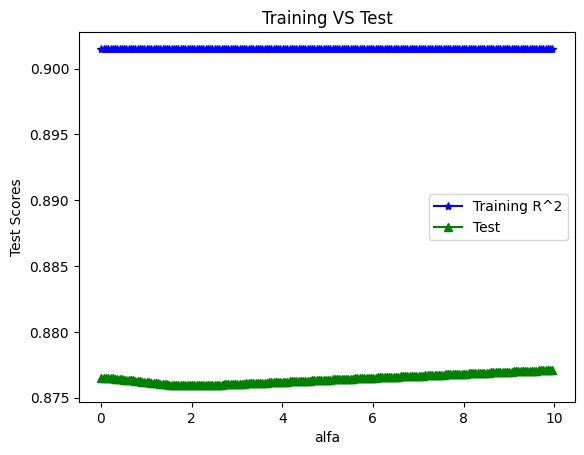

In [66]:
# Plotting Year on x-axis and test1 & test_2 on y-axis
plt.plot(results_df['Alpha'], results_df['Training R^2'], label='Training R^2', marker='*', color='b')
plt.plot(results_df['Alpha'], results_df['Test R^2'], label='Test', marker='^', color='g')

# Adding labels and title
plt.xlabel('alfa')
plt.ylabel('Test Scores')
plt.title('Training VS Test')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [67]:
lasso = Lasso(alpha=1000)  # 'alpha' controls regularization strength
lasso.fit(X_train, y_train)

# Evaluate the model
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print("Training R^2:",train_score)
print("Test R^2:", test_score)
print("Lasso Coefficients:", lasso.coef_)

Training R^2: 0.8873303520539624
Test R^2: 0.890906454785809
Lasso Coefficients: [  3582.47064481      0.           -980.14767274     -0.
   -364.2054448   12392.0238945    4045.05929515   5651.32271296
    836.71736195   4640.10134181   4367.29529075     -0.
   5901.83142949  -1155.00727761   -765.23580715  -6514.68307547
   9696.11483635    575.57148593     -0.           2574.578761
      0.           -119.94842435  25064.29572793   2039.76897205
      0.            368.80033535      0.          -1162.27132141
   4302.48240776    803.62341365   2715.94960602   3401.07144254
      0.           5248.27187995   -371.36369936     -0.
   1224.31753172      0.             -0.            445.79814082
    192.59180387   2104.58372771      0.           -981.00808988
      0.            365.58514748      0.              0.
     -0.             -0.              0.              0.
   -138.53409948     -0.             -0.             -0.
     -0.          -1596.63514843      0.             -0.
  

In [68]:
# Get coefficients and feature names
coefficients = lasso.coef_
feature_names = X.columns

# Combine coefficients and feature names into a DataFrame
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


# Sort the DataFrame by absolute value of the coefficients
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

# Get the top 30 strongest features
top_30_features = coef_df_sorted.head(30)

# Print the top 30 features with their coefficients
print(top_30_features)

                  Feature   Coefficient  Absolute Coefficient
22              GrLivArea  25064.295728          25064.295728
76       RoofMatl_ClyTile -13749.927933          13749.927933
5             OverallQual  12392.023895          12392.023895
16            TotalBsmtSF   9696.114836           9696.114836
147  Neighborhood_NridgHt   6869.060842           6869.060842
15              BsmtUnfSF  -6514.683075           6514.683075
12               BsmtQual   5901.831429           5901.831429
146  Neighborhood_NoRidge   5659.847085           5659.847085
7               YearBuilt   5651.322713           5651.322713
153  Neighborhood_StoneBr   5340.159433           5340.159433
33             GarageArea   5248.271880           5248.271880
122          SaleType_New   5218.791859           5218.791859
83       RoofMatl_WdShngl   4871.808938           4871.808938
9              MasVnrArea   4640.101342           4640.101342
65          BldgType_1Fam   4606.710915           4606.710915
10      

In [69]:
merged_df = pd.merge(top_30_features, top_30, left_on='Feature', right_on='feature')
merged_df

,Feature,Coefficient,Absolute Coefficient,feature,importance
0,GrLivArea,25064.295728,25064.295728,GrLivArea,10.462778
1,OverallQual,12392.023895,12392.023895,OverallQual,57.347185
2,TotalBsmtSF,9696.114836,9696.114836,TotalBsmtSF,3.825478
3,Neighborhood_NridgHt,6869.060842,6869.060842,Neighborhood_NridgHt,0.143654
4,BsmtUnfSF,-6514.683075,6514.683075,BsmtUnfSF,0.922020
5,BsmtQual,5901.831429,5901.831429,BsmtQual,1.525050
6,YearBuilt,5651.322713,5651.322713,YearBuilt,1.284938
7,GarageArea,5248.271880,5248.271880,GarageArea,2.126315
8,MasVnrArea,4640.101342,4640.101342,MasVnrArea,0.699202
9,ExterQual,4367.295291,4367.295291,ExterQual,0.624099
